# Customer Segmentation
***



## Dataset Introduction
***
The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download). It contains information of 2240 customers, with 29 attributes each. These attributes are:

**People**
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Imports
***

In [305]:
### Imports
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [306]:
## Reading the data
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## Renaming columns
df.columns = ['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'conplain','z_cost_contact', 'z_revenue', 'response']

## Basic info of the dataset
display(df.head(10))
display(df.shape)

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


(2240, 29)

## Cleaning Data + Feature Engineering
***

Creating new features to the dataset, remove outliers, clean nulls, and changing some categorical data.

In [307]:
## Checking for any null values
display(df.isnull().sum())

customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [308]:
## Fill null values with the mean
df = df.fillna(df['income'].mean())
assert (df.isnull().sum().sum() == 0)

In [309]:
# Feature engineering: Creating new, useful features

# Creating a feature with the total spent for the client
df['total_spent'] = df['mnt_wines']  + df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'] + df['mnt_gold']

# Creating a feature with the % of money spent on essential item (food-related)
df['pct_essentials'] = (df['mnt_fruits'] + df['mnt_meat'] + df['mnt_fish'] + df['mtn_sweet'])/df['total_spent']

# Creating a feature with the number of purchases for each client
df['num_purchases'] = df['num_web_purchases']+df['num_catalog_purchases'] + df['num_store_purchases']+df['num_web_visits_month']

# Creating a feature with the number of children
df['num_children'] = df['kid_home'] + df['teen_home']

# Creating a feature with the percentage of purchases made with a discount
df['pct_purchases_with_discount'] = df['num_deals_purchases'] / df['num_purchases']
df['pct_purchases_with_discount'].fillna(0, inplace=True)

# Creating a feature with the age of the client, and another with the number of days since he's enrolled with the company
df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y')

df['days_since_enrollment'] = ((datetime(2015,1,1) - df['dt_customer']).dt.days)

df['age'] =  2015 - df['year_birth']

In [310]:
# Group some categories that have a similar meaning
df['relationship'] = df['marital_status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df["education"] = df["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [311]:
## Removing outliers
df = df[(df['age'] < 90) & (df['income'] < 200000)].reset_index(drop = True)

print("The new dataset have {} rows.".format(df.shape[0]))

The new dataset have 2236 rows.


In [312]:
## Since there are just 2 values with 0 purchases and both of them with a low total spent, we'll replace the 0's with 1's.
df.loc[(df['num_purchases'] == 0,'num_purchases')]=1

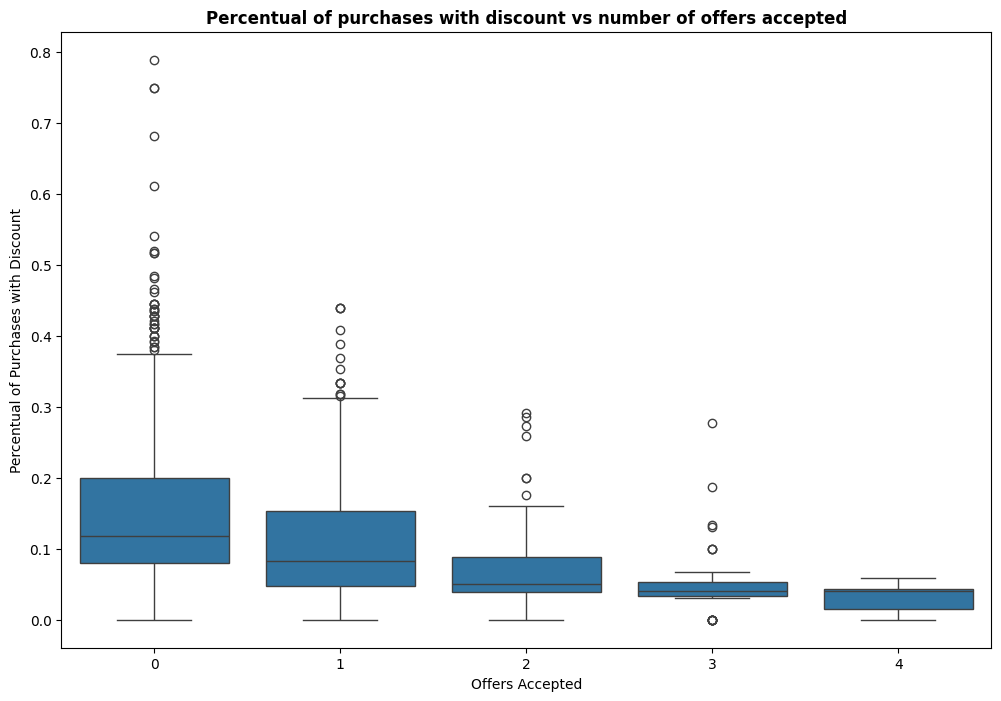

In [313]:
## Checking the relationship between the "offers accepted", and the "percentual of purchases with discount"
df['accepted_sum'] = df['accepted_cpm3']+df['accepted_cpm4']+ df['accepted_cpm5'] + df['accepted_cpm1'] +df['accepted_cpm2']
plt.figure(figsize = (12,8))
plt.title('Percentual of purchases with discount vs number of offers accepted', fontweight = 'bold')
sns.boxplot(data = df, x = 'accepted_sum', y = 'pct_purchases_with_discount')
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount');

They have an opposite correlation. Therefore, I'm not going to use these "accepted~" features, because of the incongruence and use the "pct_purchases_with_discount" instead, that will give a similar idea, in a more straightfoward way.

In [314]:
### Dropping columns: Since I am going to use perform clusterization ahead, it's important to only keep the
## most important features, because I dont't want the clusters to be created
# based on attributes that are not that important

df = df.drop(['num_web_visits_month','recency', 'conplain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish',
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)


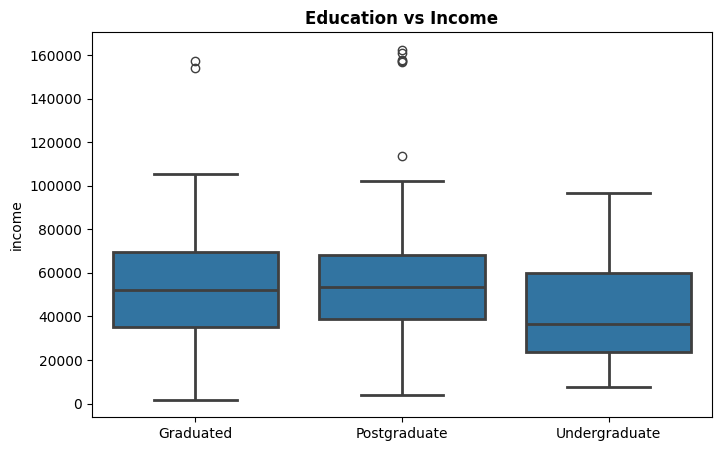

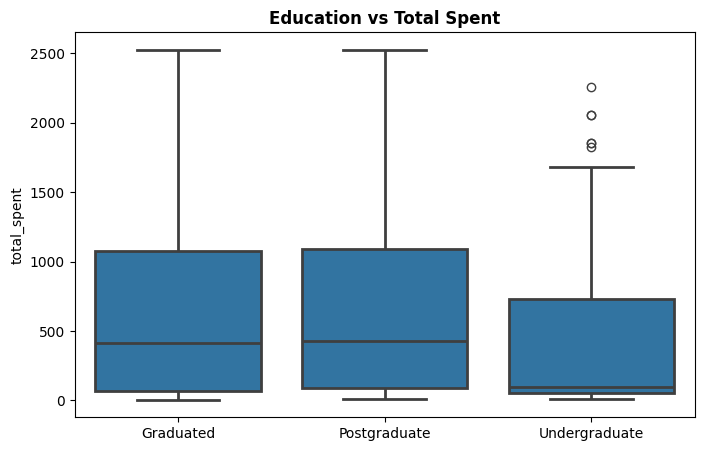

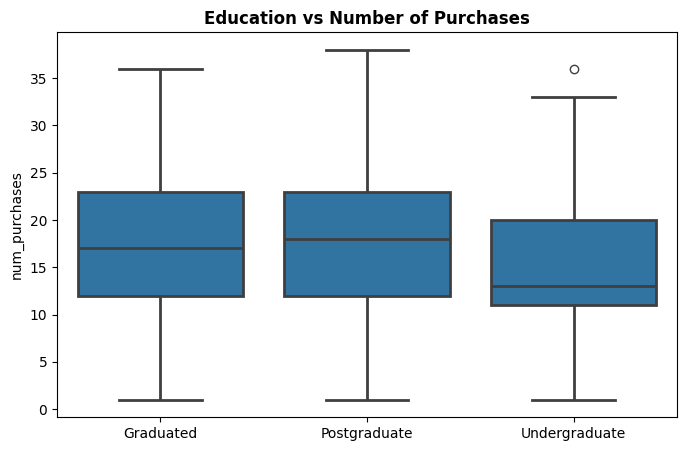

In [315]:
## Purchase behaviour vs Education
plt.figure(figsize = (8,5))
plt.title("Education vs Income", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['income'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Total Spent", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['total_spent'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

plt.figure(figsize = (8,5))
plt.title("Education vs Number of Purchases", fontweight = 'bold', fontsize = 12)
sns.boxplot(y = df['num_purchases'] , x = df['education'], linewidth = 2)
plt.xlabel("")
plt.show()

Looking at the purchase behaviour, it's fair to say that graduates and postgraduates have a very similar behaviour. Therefore, categorizing them together.

In [316]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

## Exploratory Data Analysis

***

In [317]:
# Some descriptive statistics
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.885957,51961.906544,2.326029,605.986583,0.421153,17.866279,0.950805,0.136283,539.773256,46.101968,0.644902
std,0.317935,21411.404811,1.933032,601.865156,0.194116,6.547265,0.752204,0.094970,202.181561,11.703281,0.478650
min,0.000000,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,186.000000,19.000000,0.000000
25%,1.000000,35502.500000,1.000000,69.000000,0.263047,12.000000,0.000000,0.066667,366.750000,38.000000,0.000000
50%,1.000000,51684.000000,2.000000,396.500000,0.428571,17.000000,1.000000,0.111111,542.000000,45.000000,1.000000
75%,1.000000,68275.750000,3.000000,1045.500000,0.570302,23.000000,1.000000,0.181818,715.000000,56.000000,1.000000
max,1.000000,162397.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,885.000000,75.000000,1.000000


In [318]:
## Creating an auxiliar column, to help with the visualization. It will be deleted afterwards.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases',
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']

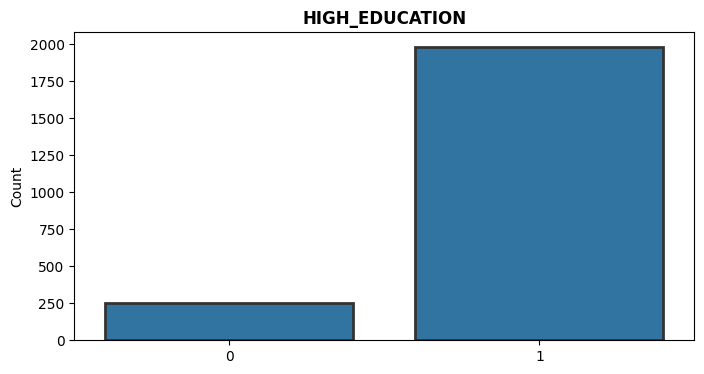

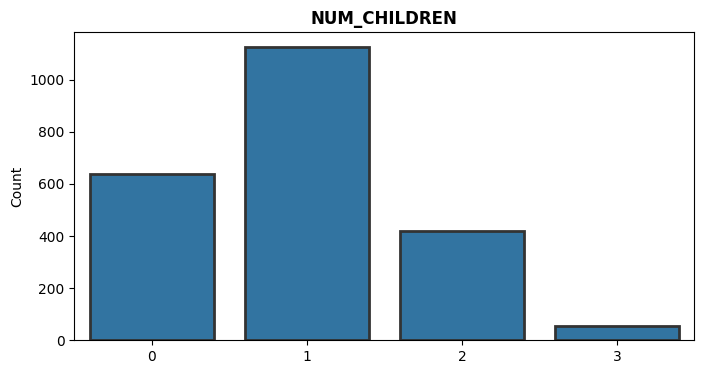

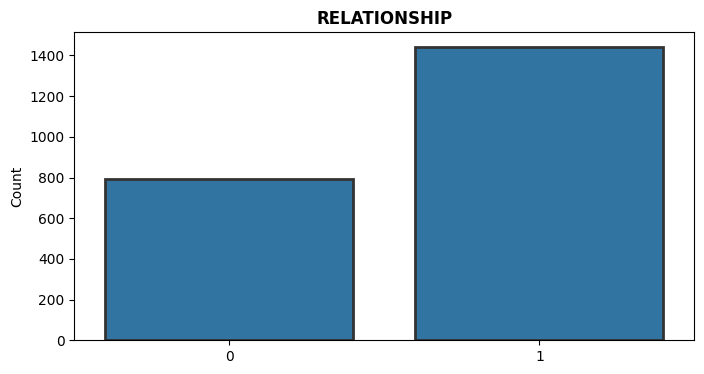

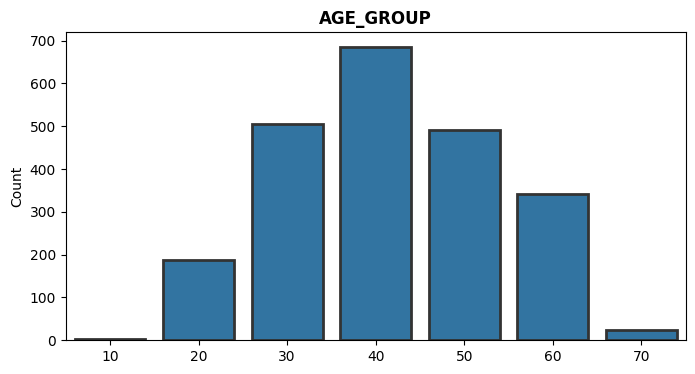

In [319]:
## Categorical distributions (even though num_children and age_group are numerical variables,
# for practical effects it makes a lot of sense to make their visualization as categorical)

for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)

    plt.show()

Most of the customers:
- Are in a relationship
- Have a high_education (graduated or more)
- Have 1 children
- Are between 30~60 years

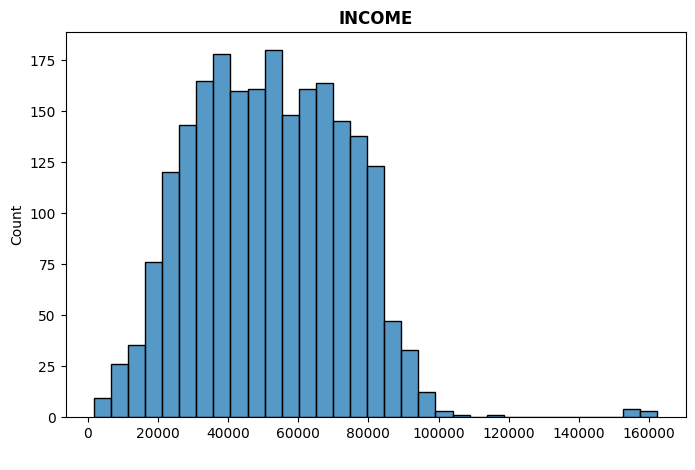

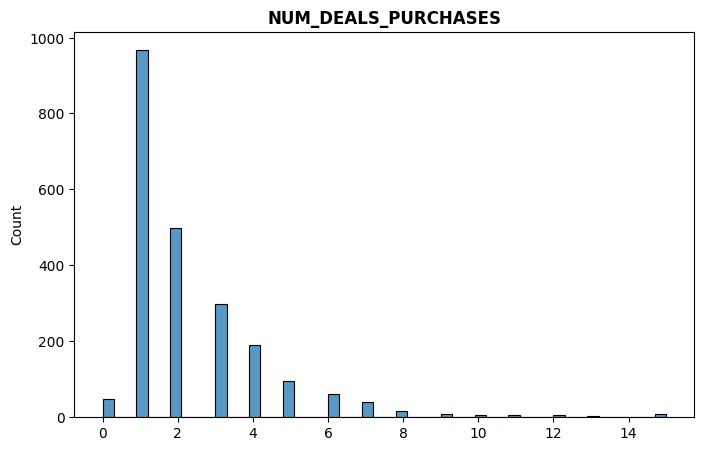

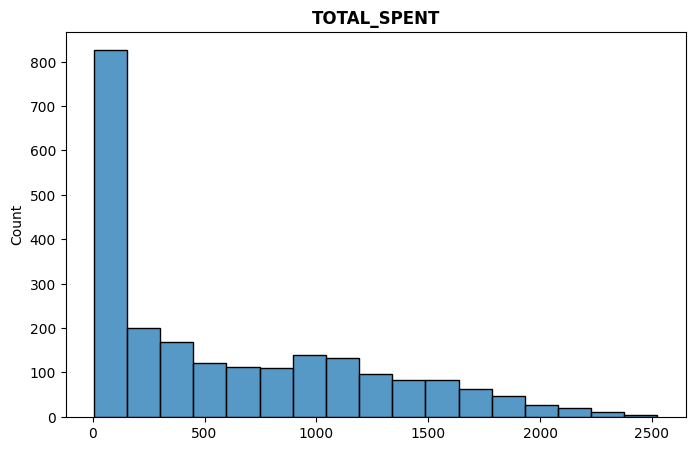

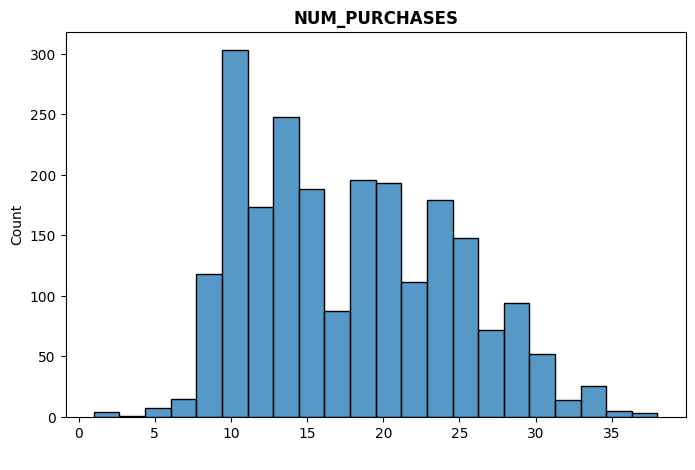

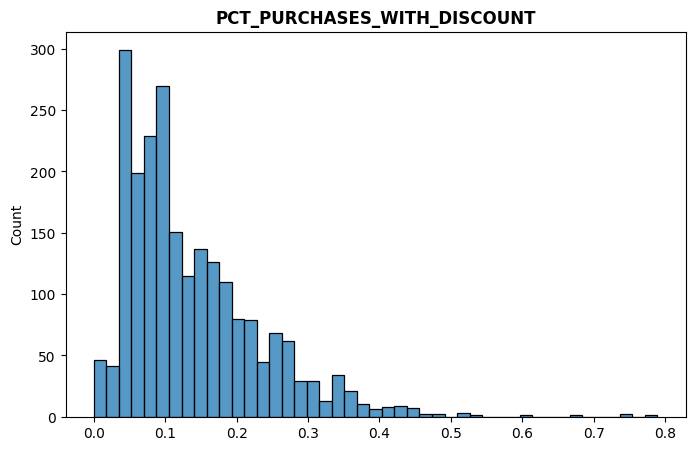

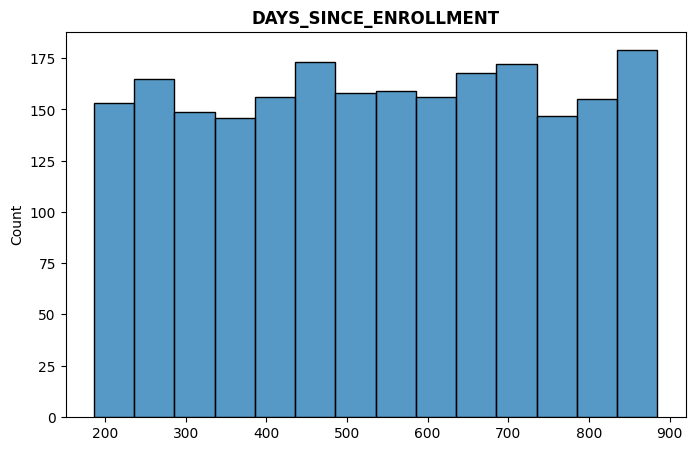

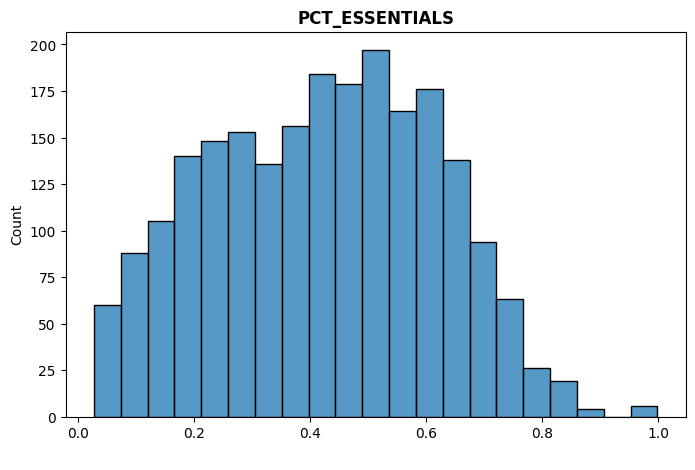

In [320]:
## Distribution of numerical variable

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.histplot(x=num, data=df)
    ax.set_xlabel(" ")
    plt.show()

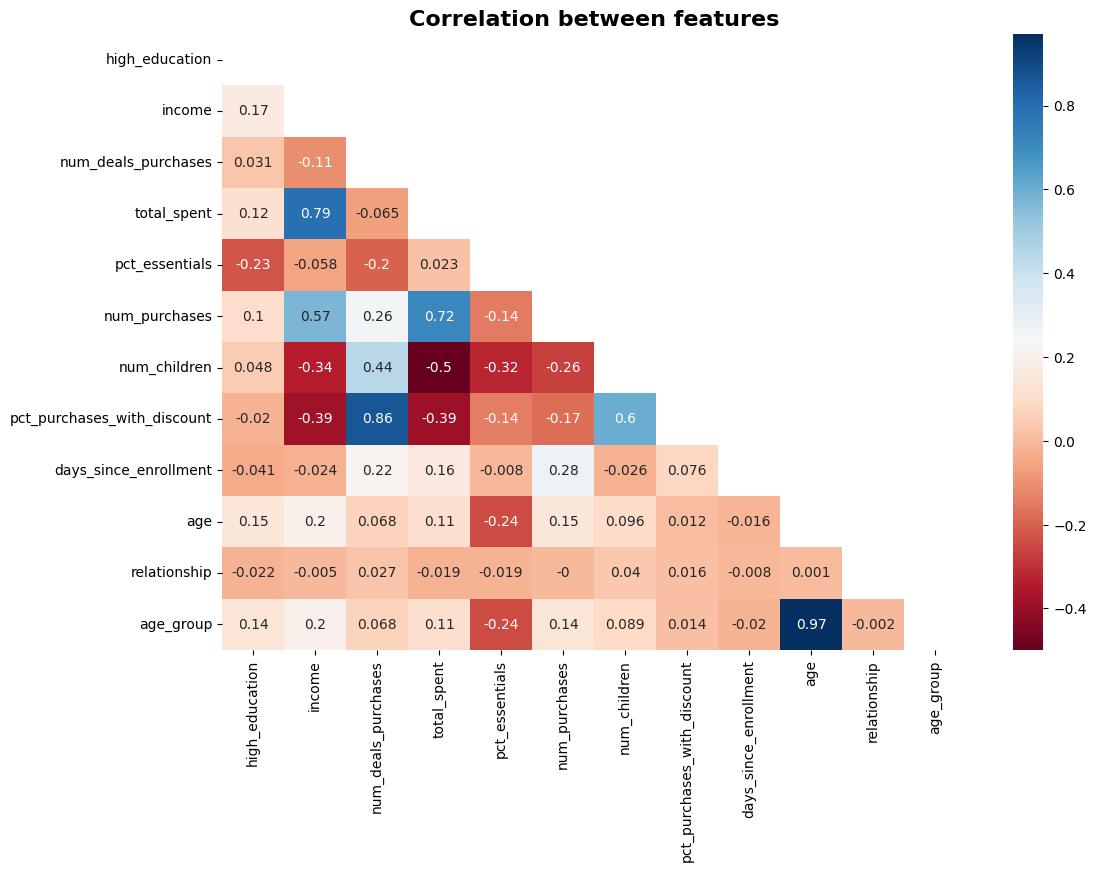

In [321]:
## Correlation Matrix
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12,8))
plt.title('Correlation between features', fontsize = 16, fontweight = 'bold')
sns.heatmap(round(df.corr(),3), annot=True, cmap="RdBu", mask = matrix);

Based on the correlation matrix, It can be seen that many variables have a strong relationship. Let's take a closer look:

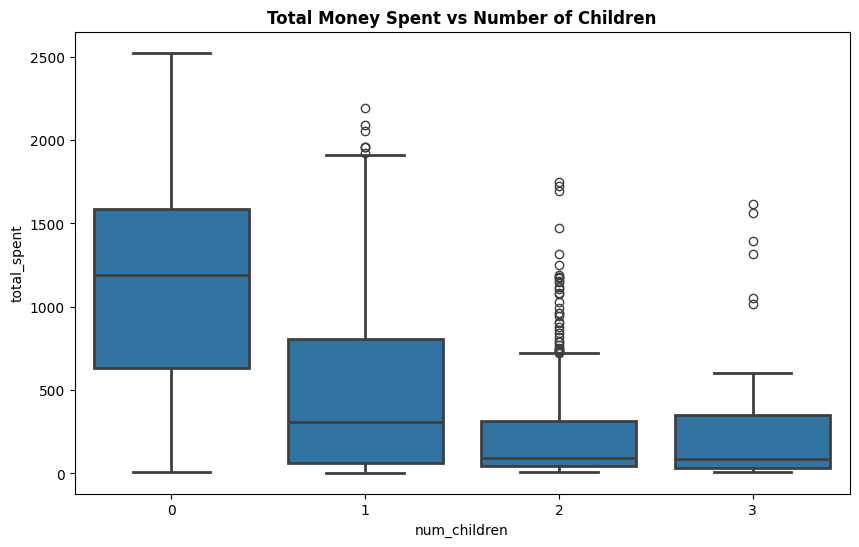

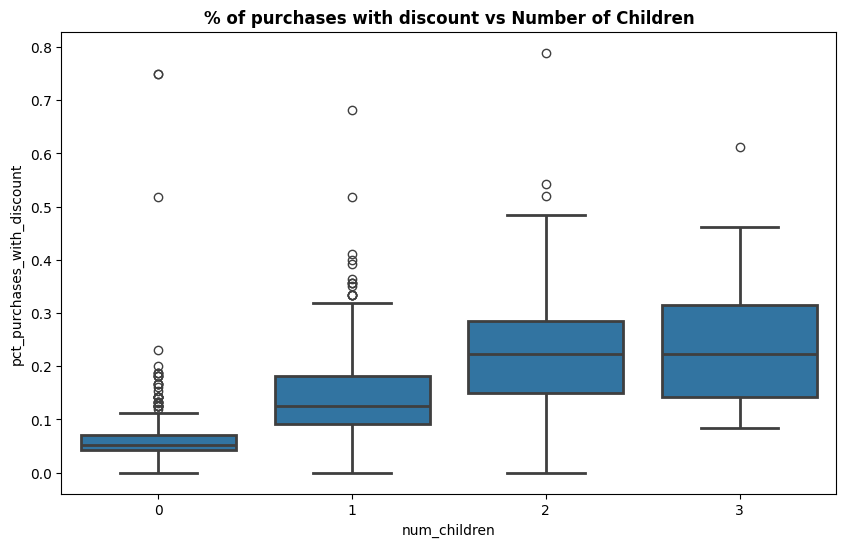

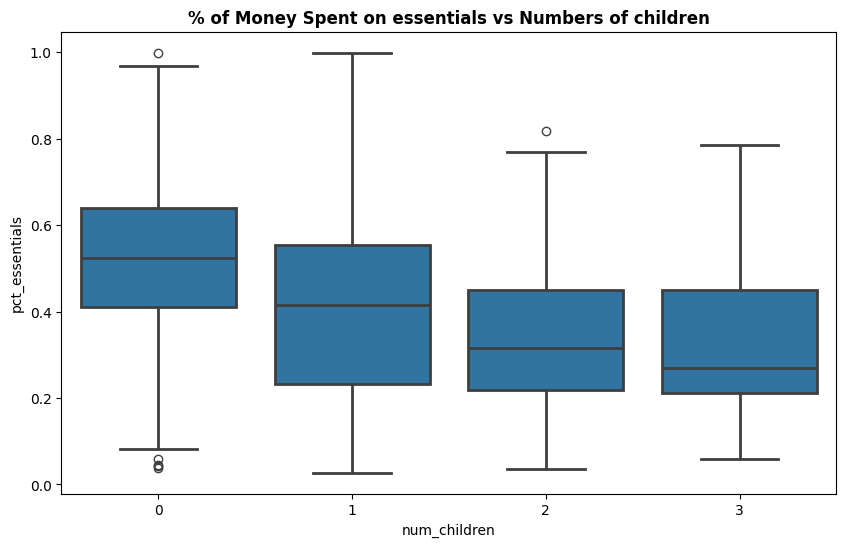

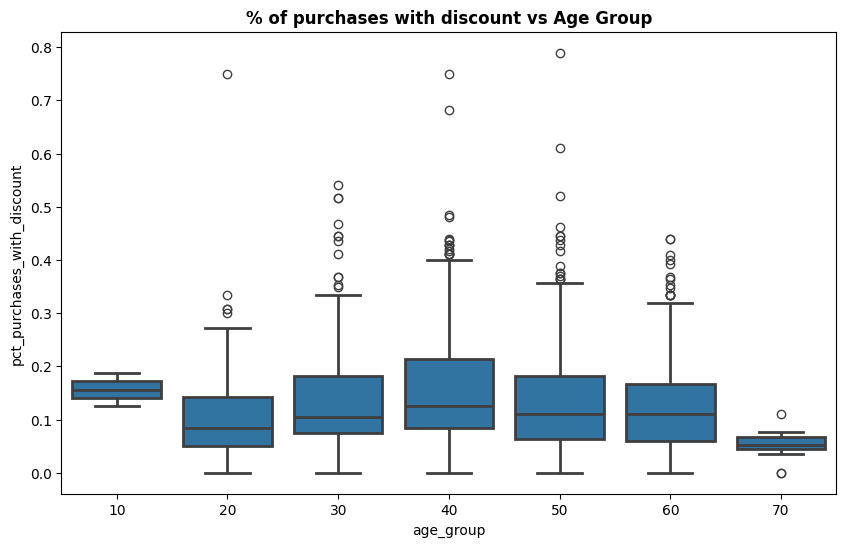

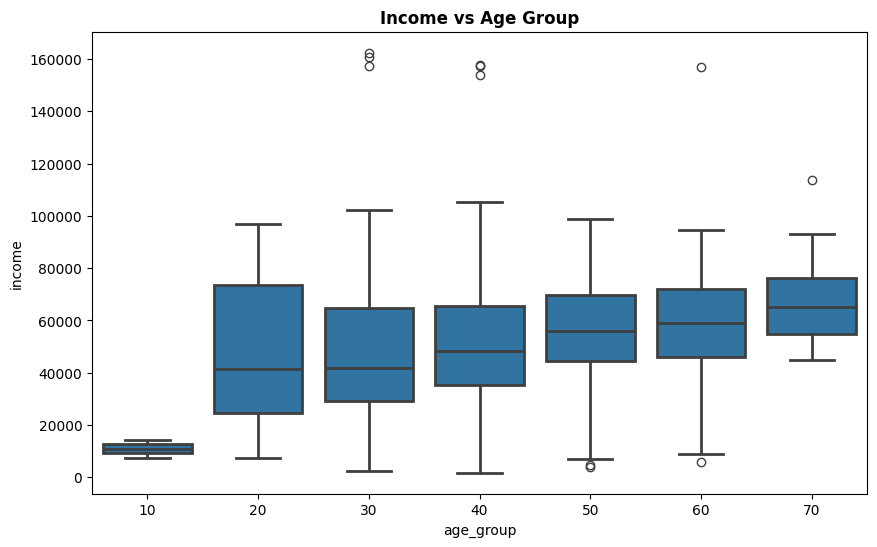

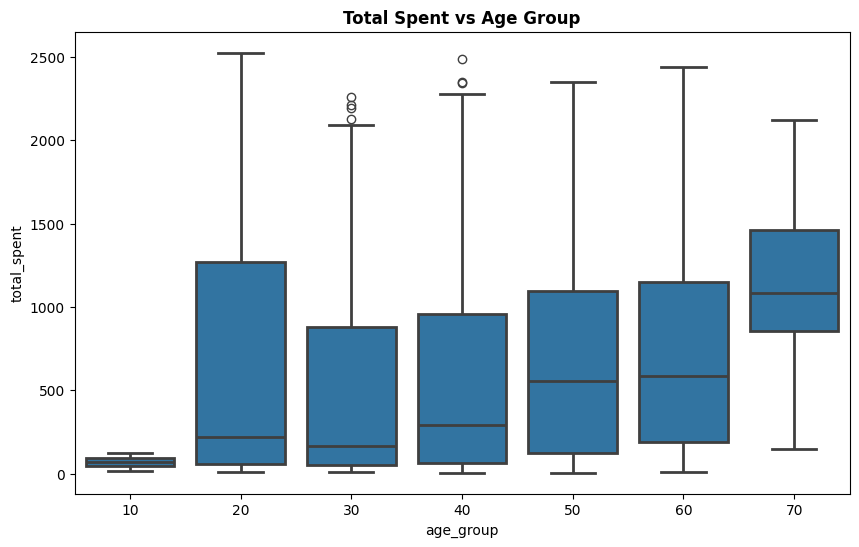

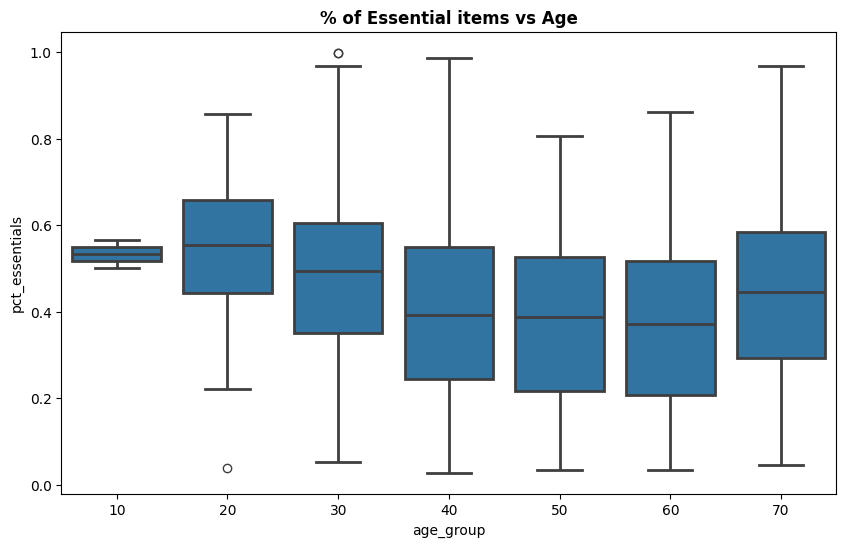

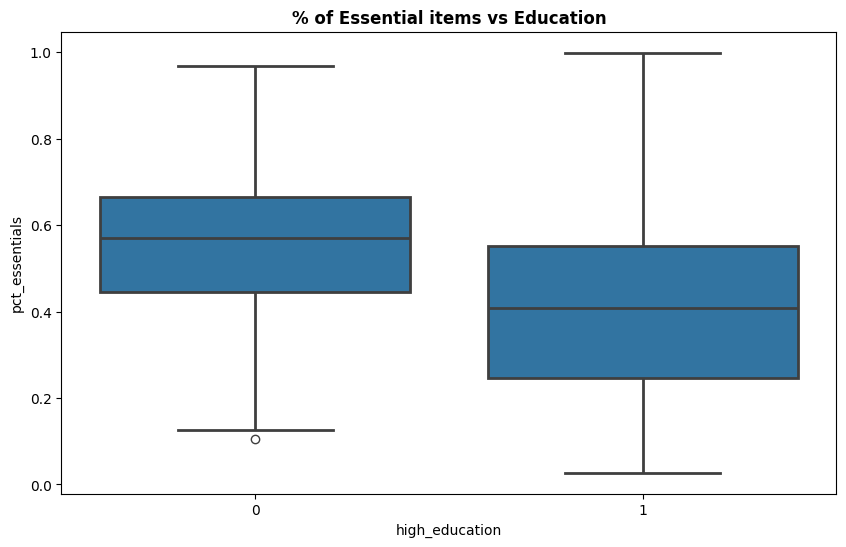

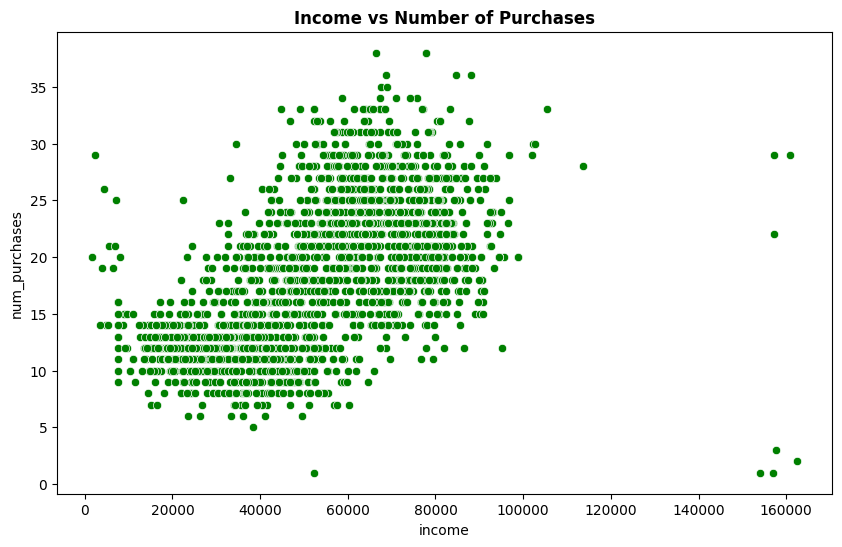

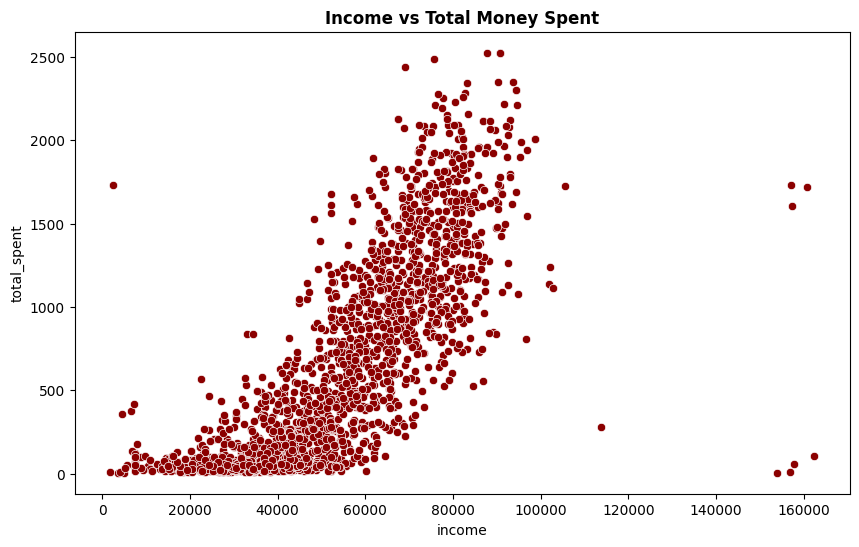

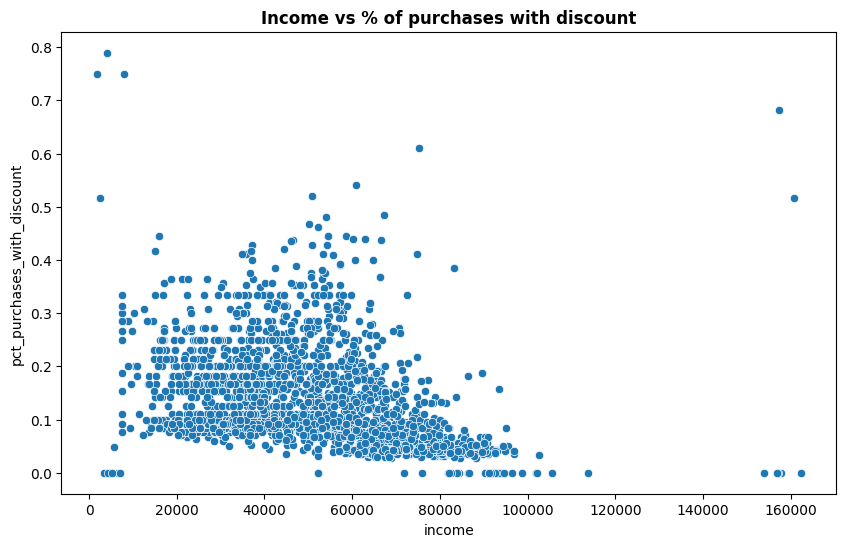

In [322]:
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children', linewidth = 2) ### esquisito
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'income', x = 'age_group', linewidth = 2)
plt.show()


plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group', linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'high_education', linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount')
plt.show()


df = df.drop(['age_group', 'days_since_enrollment'], axis = 1)

From the visualizations, we can observe certain things:

- People with no children: Spend less money, are less inclined to wait for discounts to buy their items and spend more money on essential items (fruits, fish, meat, sweet).

- Older people have a higher income
- People with higher income spend more money, and are less inclined to wait for discounts to buy their items.


## Clustering
---


### Standard Scaler

Some of the transformations on the data (PCA and Clustering) will envolve measuring distances. That can be problematic, considering that some features have very different ranges. Therefore, it is necessary to use the StandardScaler, so they can all have a similar range (mostly between -1 to 1).

In [323]:
### Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)
display(df_scaled[:5].T)

,0,1,2,3,4
high_education,0.358780,0.358780,0.358780,0.358780,0.358780
income,0.288513,-0.262438,0.917992,-1.182621,0.295754
num_deals_purchases,0.348738,-0.168700,-0.686137,-0.168700,1.383614
total_spent,1.680176,-0.962202,0.282541,-0.918994,-0.305762
pct_essentials,0.678727,-0.261669,-0.124932,1.427092,0.687108
num_purchases,1.700895,-1.354499,0.937047,-0.896190,0.173198
num_children,-1.264308,1.395139,-1.264308,0.065416,0.065416
pct_purchases_with_discount,-0.345812,0.905113,-0.996495,0.320003,1.336247
age,1.016868,1.273264,0.333146,-1.290693,-1.034298
relationship,-1.347635,-1.347635,0.742041,0.742041,0.742041


### Principal Components Analysis (PCA)

In the dataset, it has a high number of features and a lot of them have a certain level of correlation between each other, and are somewhat redundant. Performing a dimensionality reduction technique is a good option to reduce the number of features, decreasing the computation cost of the algorithm, while maintaining a good amount of information from the original dataset.

This step may be not compulsary

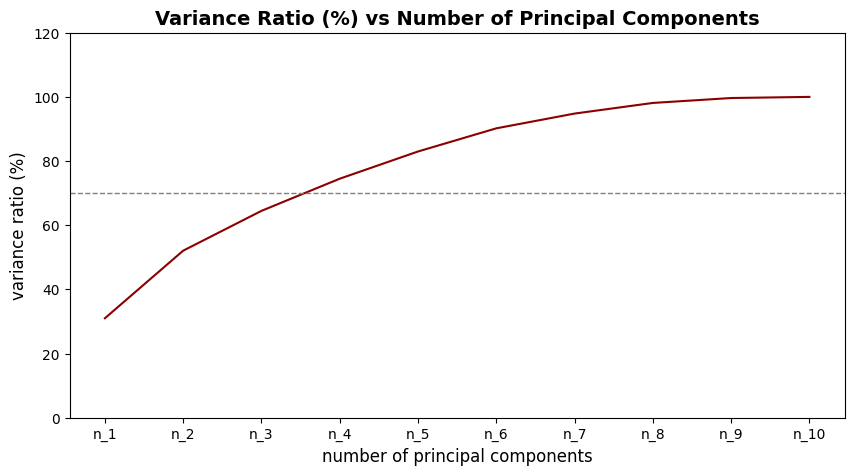

In [324]:
## Determining the number of principal components

variance_ratio = {}
for i in range(1, len(df_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()*100

plt.figure(figsize = (10, 5))
plt.plot(variance_ratio.keys(), variance_ratio.values(), color = 'darkred')
plt.axhline(70, color = 'gray', ls = '--', lw = 1)
plt.title("Variance Ratio (%) vs Number of Principal Components", fontsize = 14, fontweight = 'bold')
plt.ylabel("variance ratio (%)", fontsize = 12)
plt.xlabel("number of principal components", fontsize = 12)
plt.ylim([0, 120])
plt.show()

With 4 principal components, got almost 70% of the variance explained. That's a good result.

In [325]:
## Applying PCA to Creating a new dataset with 4 Princpal Components.

pca = PCA(n_components = 4, random_state = 123)
pca.fit(df_scaled)
df_pca = pd.DataFrame(pca.transform(df_scaled),
                      columns = (["PC1", "PC2", "PC3", "PC4"]))
df_pca.head(10)

,PC1,PC2,PC3,PC4
0,-2.274351,1.038793,0.657425,1.394765
1,1.873943,0.221423,-1.444409,1.300393
2,-2.032854,-0.038882,-0.403002,-0.784897
3,1.362291,-1.679339,0.632087,-0.542764
4,0.935971,0.760547,1.514053,-0.494132
5,-0.979444,0.880919,-0.501325,-0.799625
6,0.003140,0.680897,0.827462,1.465404
7,0.839718,-0.916329,0.079205,-0.639904
8,0.578044,-1.760940,-0.250323,-0.674539
9,1.236792,0.175796,-2.292214,-0.920289


Having a new dataset with the 4 principal components. In the next step, we are going to apply the k-means on this new dataset.

## K-Means

We are going to use the k-means algorithm to create clusters.
First, we'll need to determine the ideal number of clusters. We are going to to that by comparing two techniques: the elbow method and the silhouette score.

In the elbow method, we plot the WCSS (Within-Cluster Sum of Square) vs the number of clusters. The WCSS is the sum of squared distance between each point and the centroid in a cluster. Naturally, as we increase the number of clusters, this value will always get smaller.

What we are looking for is a value of N that, from that point forward, the decrease of WCSS won't be very significative.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

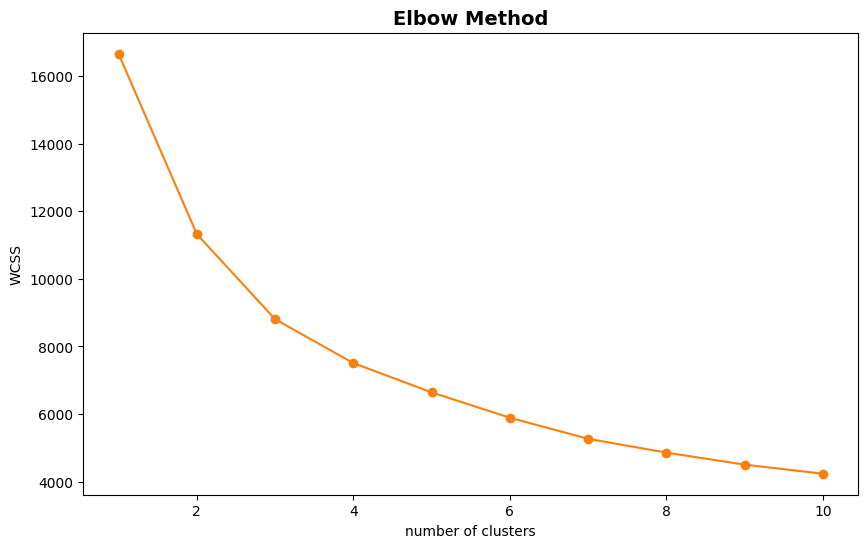

In [326]:
## Determining the ideal number of clusters: Elbow method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', color = 'tab:orange')
plt.title('Elbow Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

Taking a look at the curve, it's not really clear what is the ideal number of clusters. So double checking it with the silhouette scores.

*The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

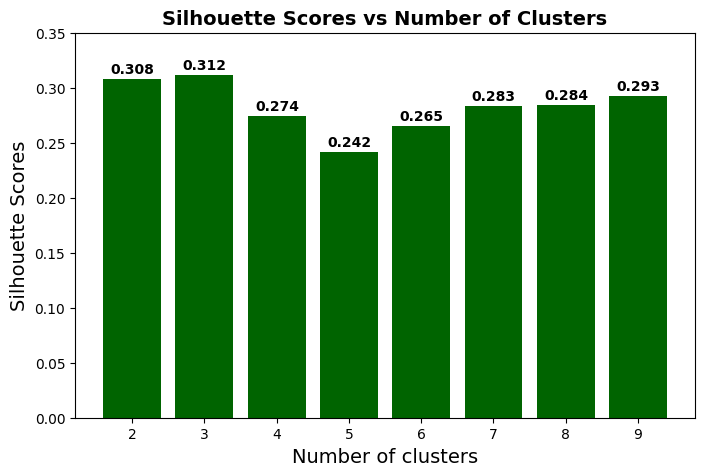

In [327]:
silhouette_scores = []

for i in range(2,10):
    m1 = KMeans(n_clusters=i, random_state=123)
    c = m1.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, m1.fit_predict(df_pca)))

plt.figure(figsize = (8,5))
plt.bar(range(2,10), silhouette_scores, color = 'darkgreen')
plt.title("Silhouette Scores vs Number of Clusters", fontsize = 14, fontweight = 'bold')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Silhouette Scores', fontsize = 14)
plt.ylim(0,0.35)
for a, b in enumerate(silhouette_scores):
    plt.text(a + 1.7, b + 0.005, str(round(b,3)), color='black', fontweight='bold')
plt.show()

That settles: Going to use the K-Means with 3 clusters, and add the results to the original dataset.

In [328]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(df_pca)
pred = kmeans.predict(df_pca)
df['cluster'] = pred + 1
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,age,relationship,cluster
0,1,58138.0,3,1617,0.552876,29,0,0.103448,58,0,2
1,1,46344.0,2,27,0.370370,9,2,0.222222,61,0,1
2,1,71613.0,1,776,0.396907,24,0,0.041667,50,1,2
3,1,26646.0,2,53,0.698113,12,1,0.166667,31,1,1
4,1,58293.0,5,422,0.554502,19,1,0.263158,34,1,3


## Analyzing the clusters

Compare the clusters:

<ipython-input-329-01614c871769>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)


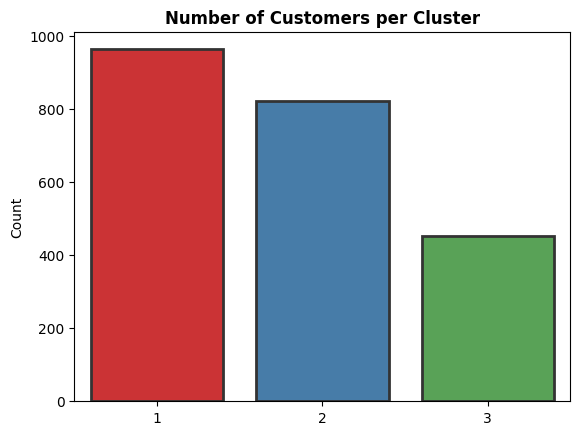

In [329]:
aux = df.cluster.value_counts()/len(df.count())
plt.title('Number of Customers per Cluster', fontweight = 'bold')
aux = df.groupby('cluster').size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
ax = sns.barplot(x='cluster', data=aux, y = 0, linewidth=2, edgecolor=".2",  palette = 'Set1').set(ylabel="Count", xlabel = None)

In [330]:
# Creating an auxiliar dataset to help the evaluation
clusters_evaluation = df.groupby('cluster').mean().T
clusters_evaluation['mean_dataset'] = df.mean().T
clusters_evaluation

cluster,1,2,3,mean_dataset
high_education,0.827622,0.928224,0.933481,0.885957
income,35004.772603,72422.602502,50877.711218,51961.906544
num_deals_purchases,1.711319,1.457421,5.221729,2.326029
total_spent,108.835929,1224.389294,540.419069,605.986583
pct_essentials,0.454990,0.445566,0.304409,0.421153
num_purchases,12.330218,22.885645,20.538803,17.866279
num_children,1.131880,0.401460,1.565410,0.950805
pct_purchases_with_discount,0.139721,0.063851,0.260956,0.136283
age,42.856698,47.878345,49.793792,46.101968
relationship,0.651090,0.620438,0.676275,0.644902


In [331]:
plt.figure(figsize = (8,8))
clusters_evaluation.drop('mean_dataset', axis = 1).style.background_gradient(cmap='RdYlGn',axis=1)

cluster,1,2,3
high_education,0.827622,0.928224,0.933481
income,35004.772603,72422.602502,50877.711218
num_deals_purchases,1.711319,1.457421,5.221729
total_spent,108.835929,1224.389294,540.419069
pct_essentials,0.454990,0.445566,0.304409
num_purchases,12.330218,22.885645,20.538803
num_children,1.131880,0.401460,1.565410
pct_purchases_with_discount,0.139721,0.063851,0.260956
age,42.856698,47.878345,49.793792
relationship,0.651090,0.620438,0.676275


<Figure size 800x800 with 0 Axes>

From the table above, got a good idea of the differences between the clusters.

> At first glance, we can see that the income is very important to divide the users: In the cluster 1, we have a lot of customers with medium income, the cluster 2 we have people with lower-income, and the 3, with a higher income.

Making some more visualizations, to get some more insights.



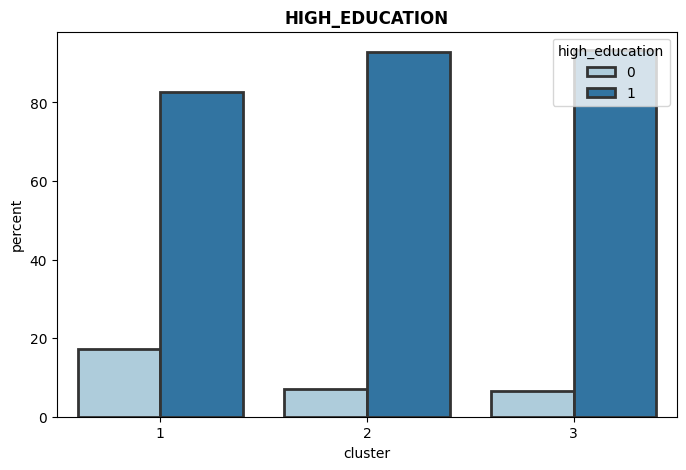

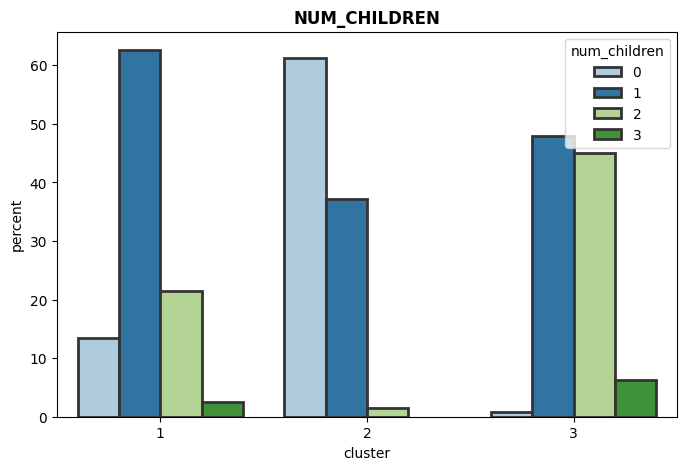

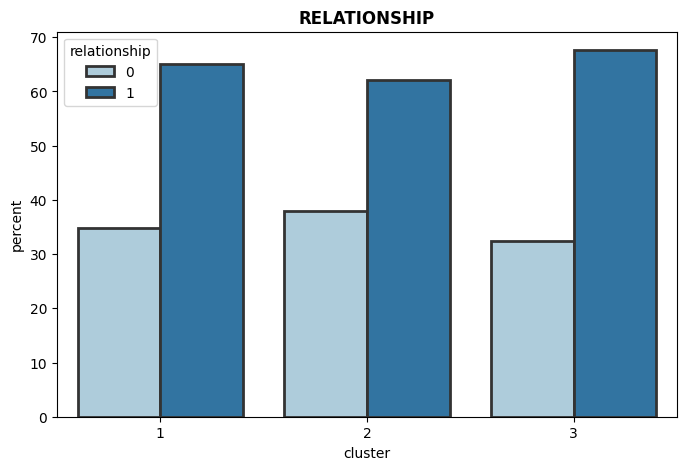

In [332]:
## Categorical Visualizations

cat_columns = ['high_education','num_children', 'relationship']
num_columns = ['income','total_spent','num_purchases',
       'pct_purchases_with_discount', 'age', 'pct_essentials']

for cat in cat_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(cat), fontweight = 'bold')
    df_aux = df.groupby('cluster')[cat].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    sns.barplot(data = df_aux, x='cluster',y='percent',hue=cat, palette = 'Paired',linewidth=2, edgecolor=".2");
    plt.show()

**Notes:**

- Most of the users without high-education falls into the cluster 2
- Pretty much everyone of the cluster 1 have at least 1 children.
- Pretty much everyone of the cluster 3 have 0 or 1 children

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


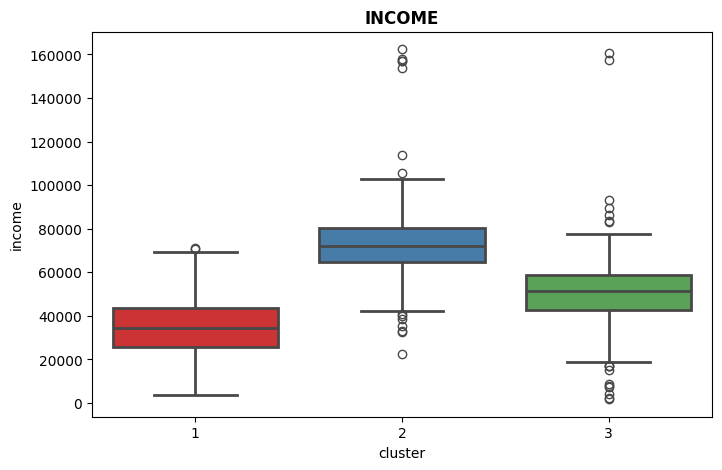

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


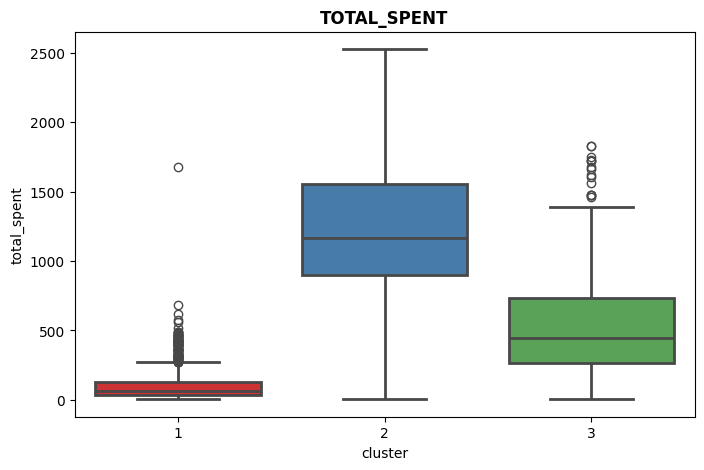

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


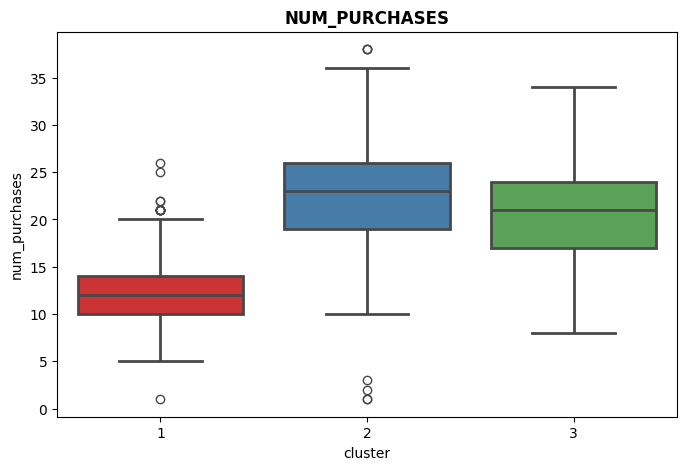

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


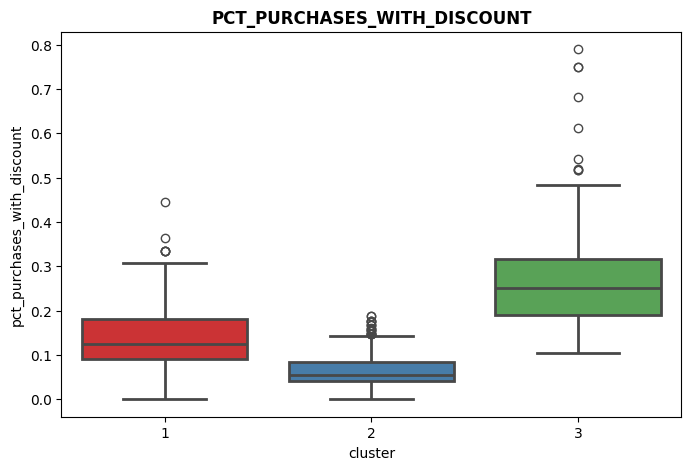

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


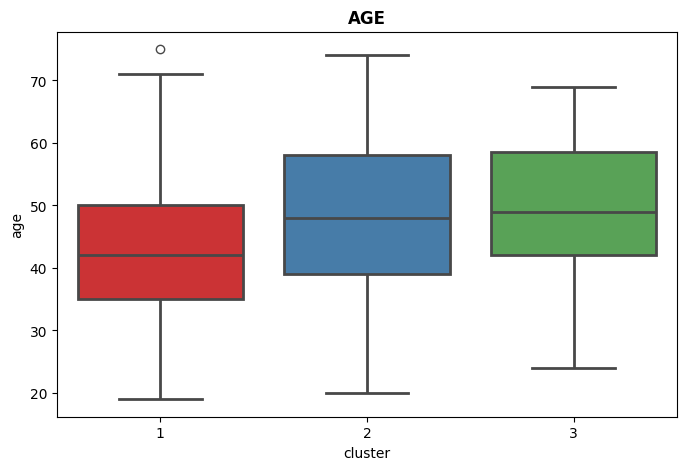

<ipython-input-333-ca2fb1233411>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)


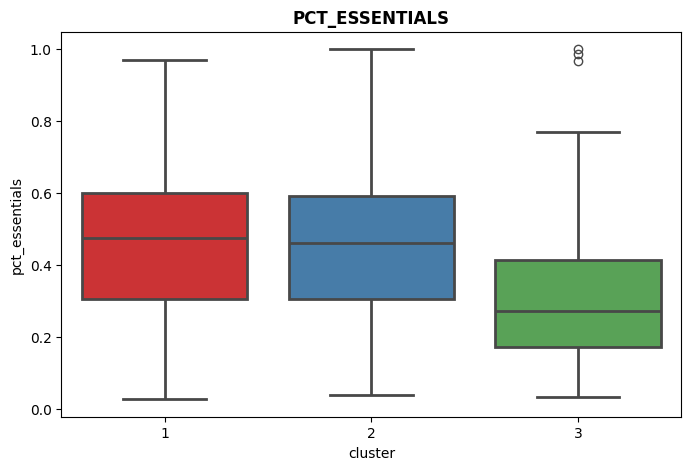

In [333]:
## Numerical Variables

for num in num_columns:
    plt.figure(figsize = (8,5))
    plt.title(str.upper(num), fontweight = 'bold')
    ax = sns.boxplot(y=num, x = 'cluster', data=df, palette = 'Set1', linewidth = 2)#.set(ylabel="Count", xlabel = None)
    plt.show()

#### Notes:

##### <ins>Income:<ins>
- 1: High Income
- 2: Low Income
- 3: Medium Income

#### <ins>Total Spent:<ins>
- 1: high spent
- 2: low spent
- 3: medium spent

#### <ins>Percentage of Items bought with discount:<ins>
- 3: Buys a lot of items with discount
- 1: Buys a lot of items without discount

#### <ins>Percentage of essential items bought:<ins>
- 3: Buys a lot of non-essential items (wine + gold)

#### <ins>Age:<ins>
- 2: Are considerably younger than the rest


    
Other important visualizations:

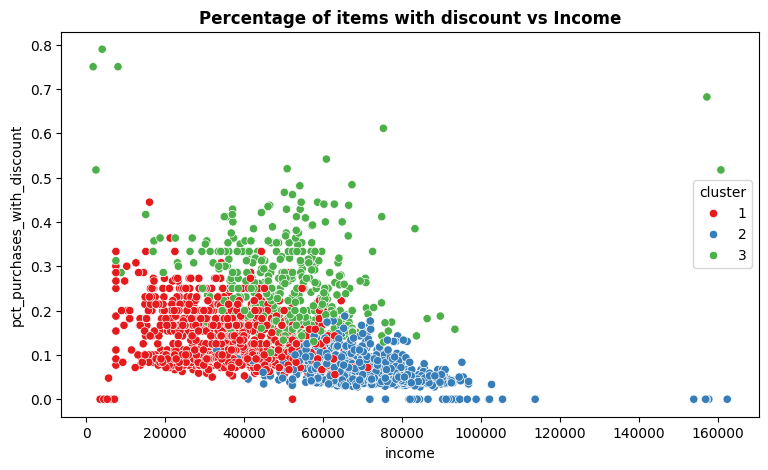

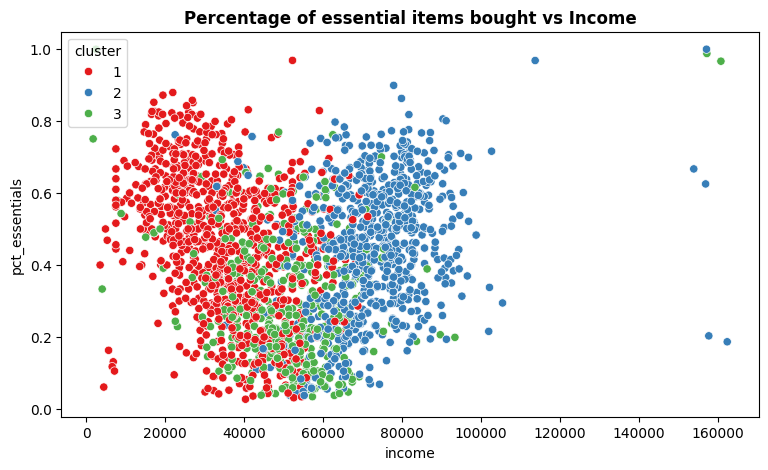

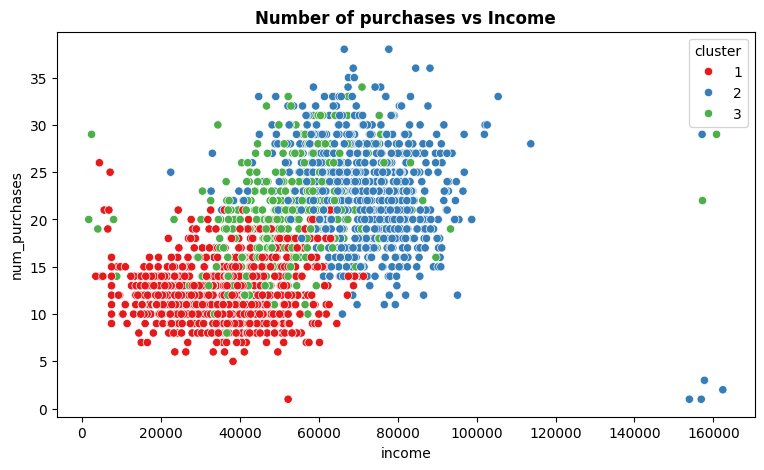

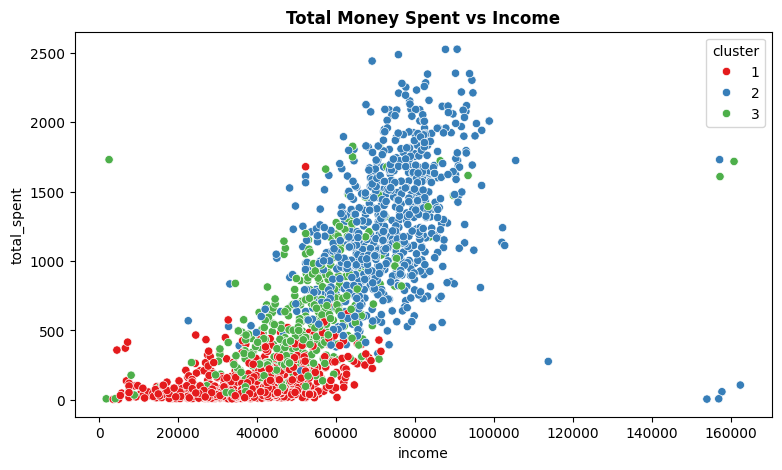

In [334]:
plt.figure(figsize = (9,5))
plt.title('Percentage of items with discount vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Percentage of essential items bought vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_essentials', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Number of purchases vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', hue = 'cluster', palette = 'Set1')
plt.show()

plt.figure(figsize = (9,5))
plt.title('Total Money Spent vs Income', fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', hue = 'cluster', palette = 'Set1')
plt.show()

## Conclusions:
***


### Cluster 1:


- About 36% of the customers
- High income group
- Almost everybody have 0 or 1 children.
- Spend a lot of money
- Don't buy a lot of things with discount


### Cluster 2:

- Bigger cluster (about 44%)
- Smaller income group
- Don't spend a lot of money
- Don't make a lot opf
- Contains most of the people without a high-education
- Is a little younger than the average of the dataset

### Cluster 3:

- Smaller part of the customers (about 20%)
- Medium income group
- Everyone have at least 1 children
- Are very sensitive to items with discount
- Usually buys non-essential items (wine + gold)


From this clusters, It's a step closer to understand our customers behaviour. The more actionable information is that relation between the customers and the % of items bought with discount:

- It's visible people in the cluster 3 buys a lot of non-essential items, and are very sensitive to discount.
- On the other hand, people in the cluster 1 doesn't respond very well to discounts.

**Therefore, it might be a good idea to concentrate efforts to send special offers to the people in the cluster 3 (and don't send to cluster 1).**